##Importing Liberaries

In [103]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,r2_score

## Reading CSV data to Pandas DataFrame

In [138]:
data = pd.read_csv("insurance.csv")

In [139]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Preparing Data

In [140]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [141]:
data =pd.get_dummies(data, columns=['smoker',"sex","region"])

data.head()

,age,bmi,children,charges,smoker_no,smoker_yes,sex_female,sex_male,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,1,0,0,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,0,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,0,1,0,1,0,0


In [142]:

d_corr = data.corrwith(data["charges"])
d_corr

age                 0.299008
bmi                 0.198341
children            0.067998
charges             1.000000
smoker_no          -0.787251
smoker_yes          0.787251
sex_female         -0.057292
sex_male            0.057292
region_northeast    0.006349
region_northwest   -0.039905
region_southeast    0.073982
region_southwest   -0.043210
dtype: float64

## Dropping the columns of low correlated values

## and seprating Dependent and Independent variable (X & y)

In [145]:
X = data.drop(columns=["charges","children","sex_female", "sex_male", "region_northeast", "region_northwest", "region_southeast", "region_southwest"],axis=1)
X.head()

,age,bmi,smoker_no,smoker_yes
0,19,27.900,0,1
1,18,33.770,1,0
2,28,33.000,1,0
3,33,22.705,1,0
4,32,28.880,1,0


In [146]:
y = data["charges"]
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

## Spliting Data in Training and testing set

In [113]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)

## Creating simple Leniar model

In [147]:
lm=LinearRegression()

## Train the model on training data

In [148]:
lm.fit(x_train, y_train)

LinearRegression()

## Predicting the value of "y" over test data

In [149]:
Yhat = lm.predict(x_test)
Yhat[0:5]

array([11513.92073028,  9971.44509394, 37470.77604099, 16385.36162501,
        7450.37067694])

In [150]:
lm.intercept_

581.5877635610359

In [151]:
lm.coef_

array([   256.48084842,    313.33902921, -11867.5098333 ,  11867.5098333 ])

## Creating Function for model Performance visualisation

In [152]:
def plotmodel(y,Yhat):
  plt.figure(figsize=(8, 6))


  ax1 = sns.kdeplot(y, color="r", label="Actual Value")
  sns.kdeplot(Yhat, color="b", label="Fitted Values" , ax=ax1)


  plt.title('Actual vs Fitted Values for Price')
  plt.xlabel('Charges (in dollars)')
  plt.ylabel('Proportion of Insurance')

  plt.legend()

  plt.show()
  plt.close()

  r2 = r2_score(y, Yhat)

  # Calculate Mean Squared Error (MSE)
  mse = mean_squared_error(y, Yhat)

  print(f'R2 Score: {r2}')
  print(f'Mean Squared Error: {mse}')
  print (f"Model Efficiency: {round(r2*100,2)}%")

## Model Performance on simple Multivariable Leniar model

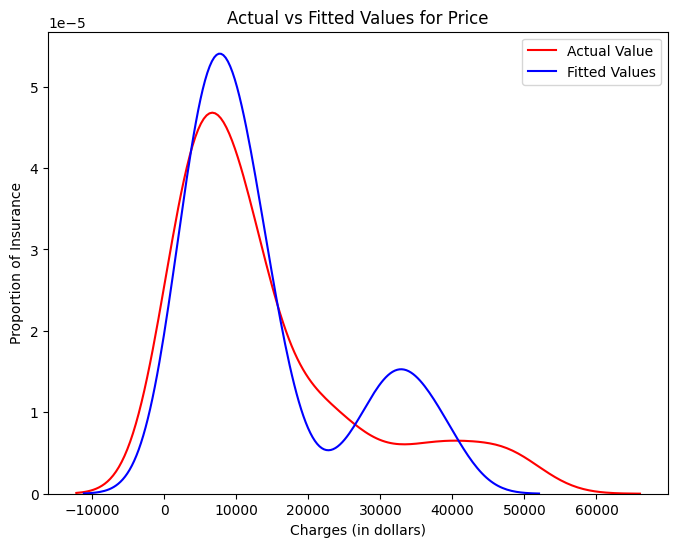

R2 Score: 0.7867600188099864
Mean Squared Error: 35536813.221198194
Model Efficiency: 78.68%


In [153]:
plotmodel(y_test,Yhat)

## Performing Polynomial Featuring to increase the performance of data with Pipelining

In [154]:
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [155]:
x_train=x_train.astype(float)
x_test=x_test.astype(float)

In [156]:
x_train_pr=pr.fit_transform(x_train)
x_test_pr=pr.fit_transform(x_test)

In [157]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False, degree=2)), ('model',LinearRegression())]

In [158]:
pipe = Pipeline(Input)

In [159]:
pipe.fit(x_train_pr,y_train)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [160]:
yPtest = pipe.predict(x_test_pr)

## Model performance after performing Polynomial Featuring and PipeLining


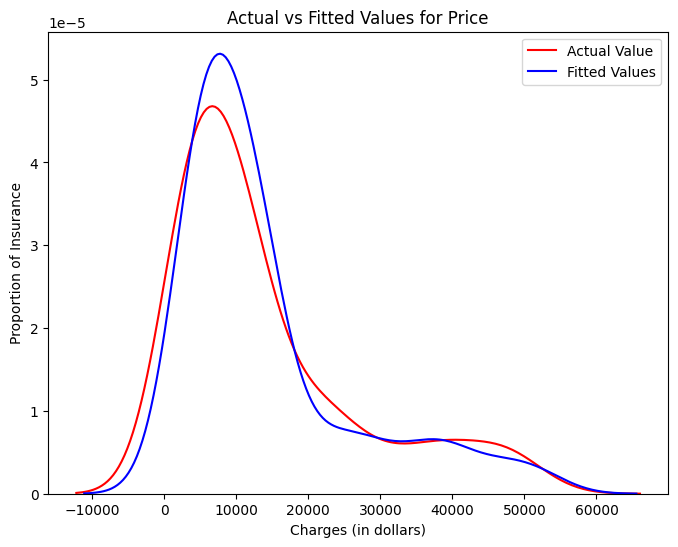

R2 Score: 0.8790209119548554
Mean Squared Error: 20161375.139590994
Model Efficiency: 87.9%


In [162]:
plotmodel(y_test, yPtest)